In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [19]:
data = pd.read_csv("C:/Users/agnie/OneDrive/Pulpit/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
data = data.dropna(subset=['Year', 'Publisher'])

In [23]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.drop(columns=['Rank'], inplace=True)

In [26]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


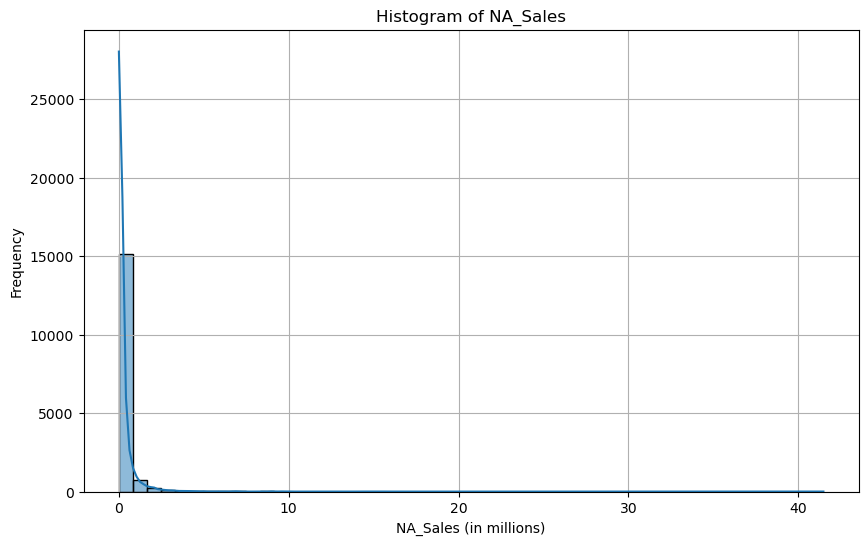

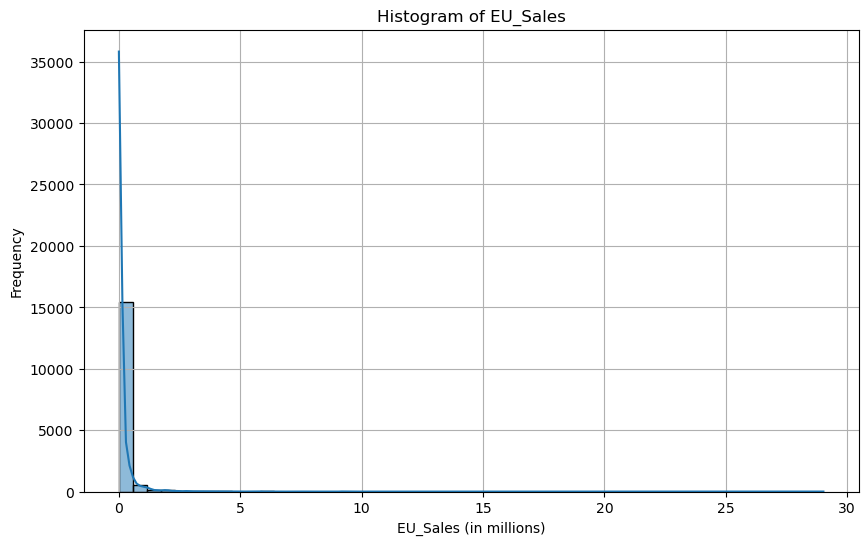

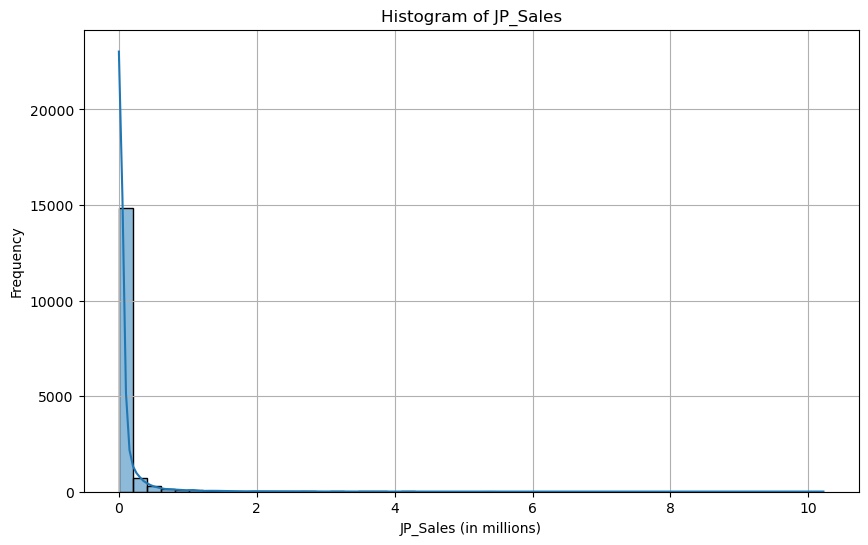

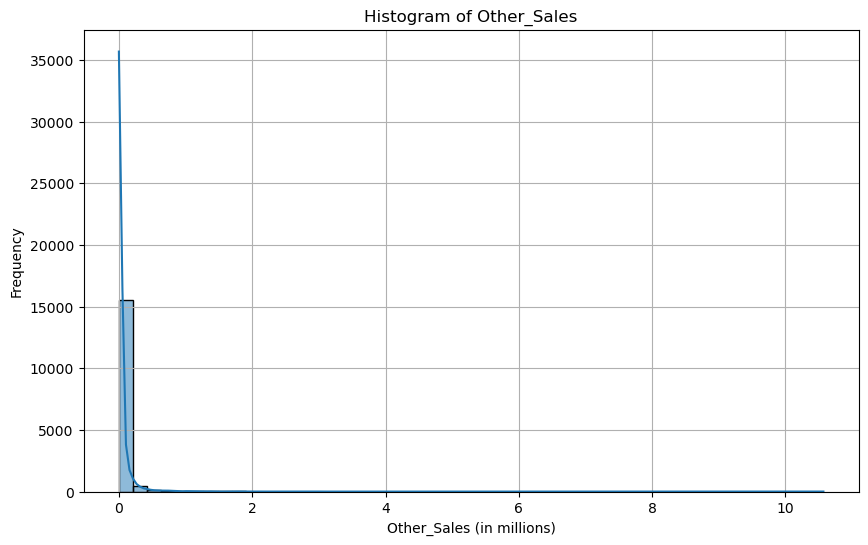

In [27]:
# Checking the distribution of game sales in individual regions (NA, EU, JP, Other).

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in sales_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col} (in millions)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

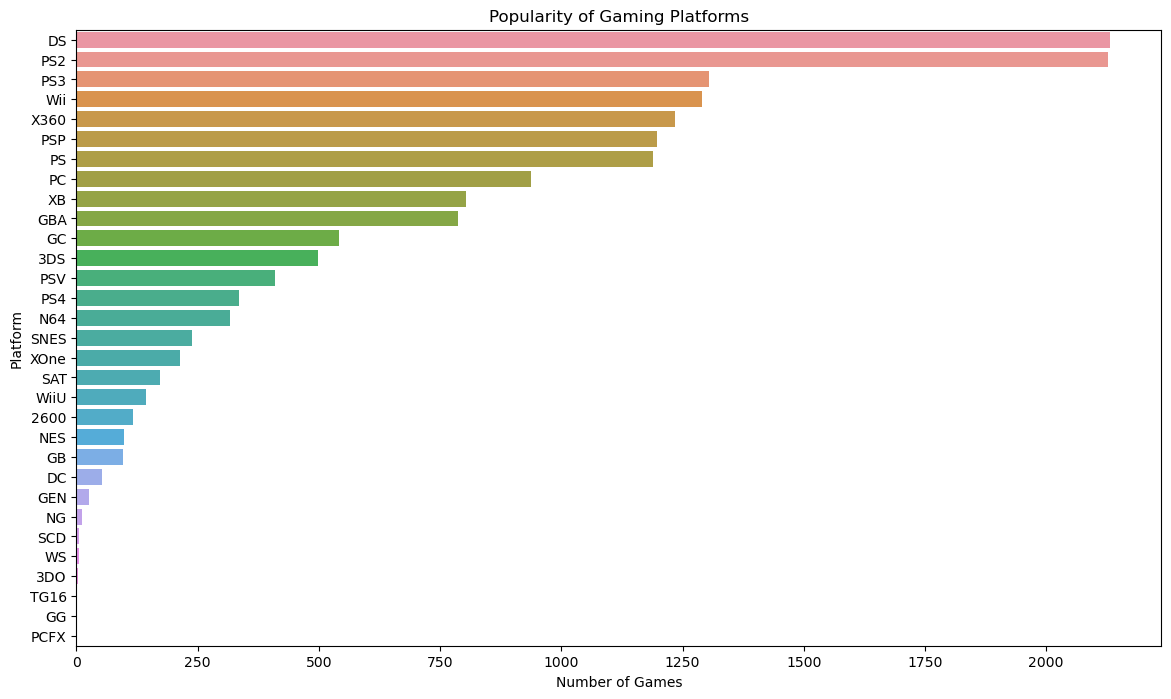

In [28]:
# Popularity of platforms

plt.figure(figsize=(14, 8))
sns.countplot(y='Platform', data=data, order=data['Platform'].value_counts().index)
plt.title('Popularity of Gaming Platforms')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

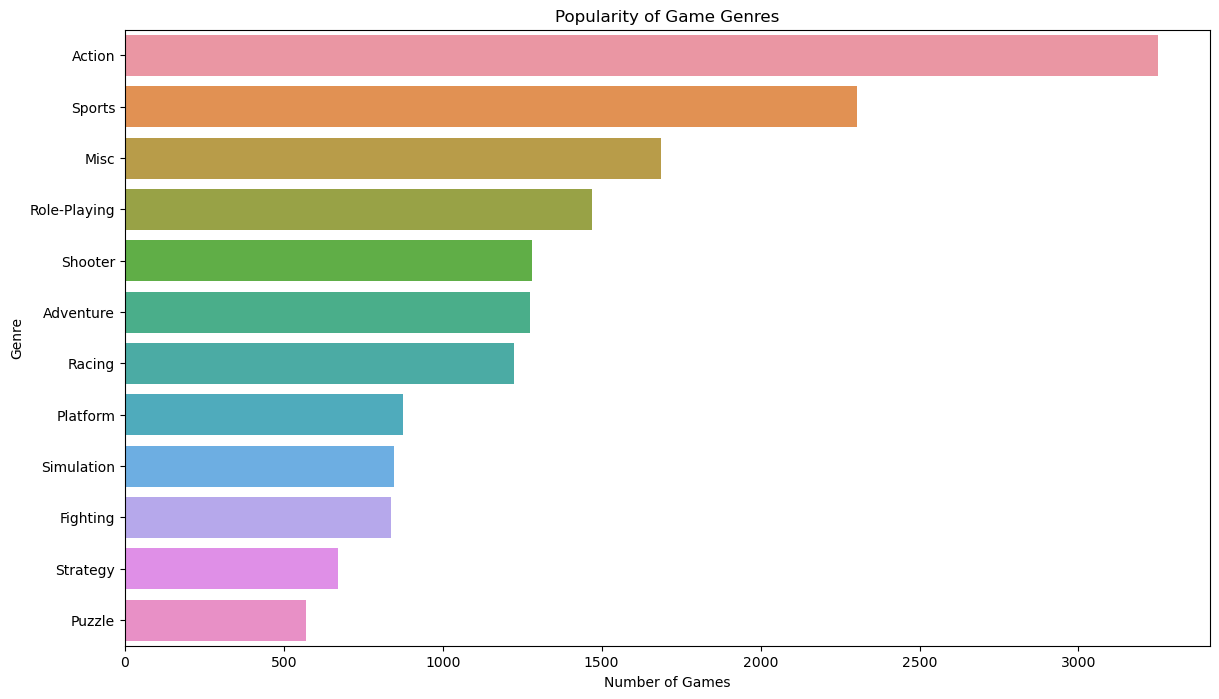

In [29]:
# Popularity of genres

plt.figure(figsize=(14, 8))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Popularity of Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

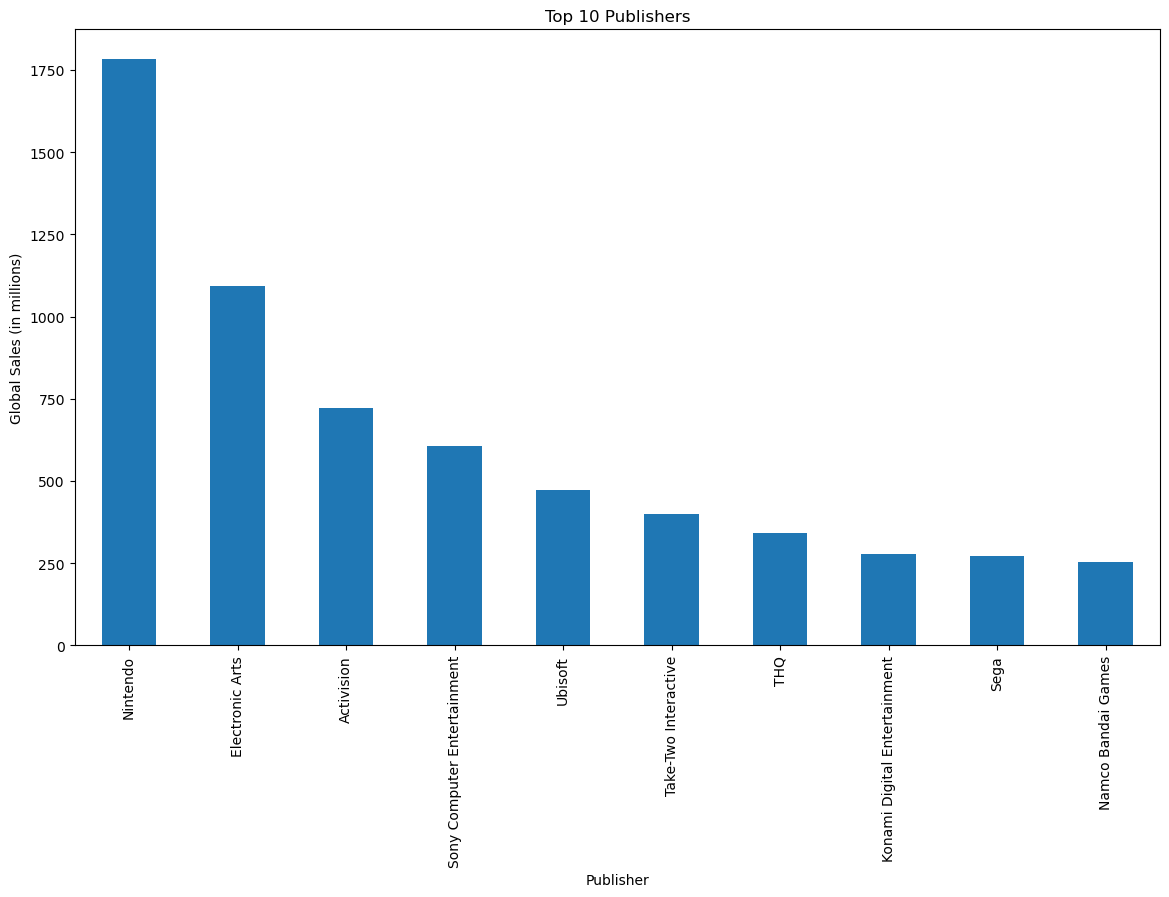

In [30]:
# Top 10 publishers

top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.show()

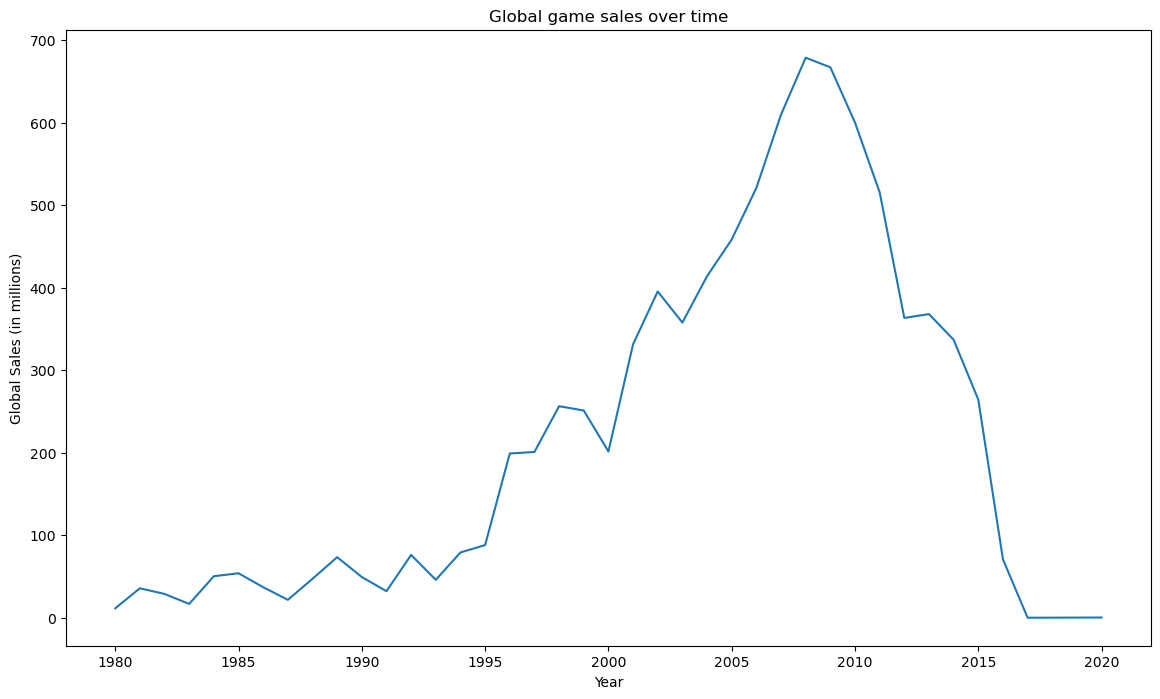

In [31]:
# Global game sales over time

plt.figure(figsize=(14, 8))
data.groupby('Year')['Global_Sales'].sum().plot(kind='line')
plt.title('Global game sales over time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

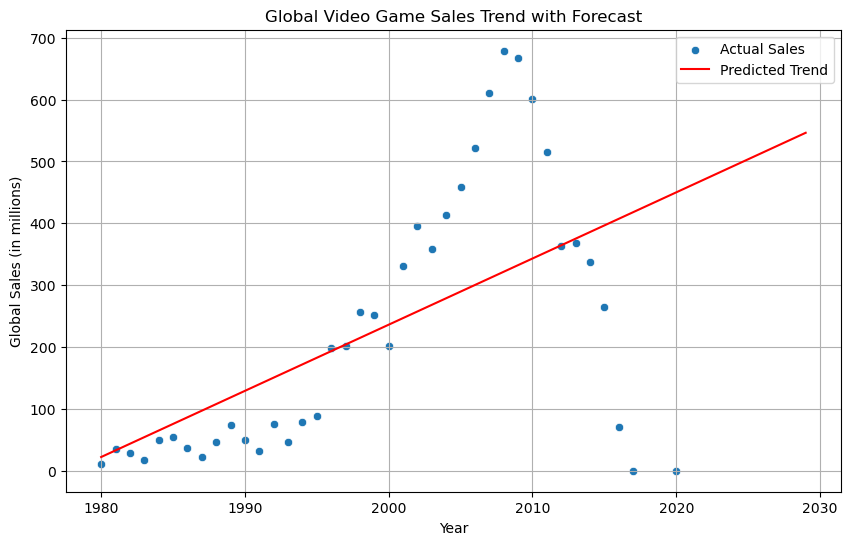

In [43]:
# Analysis of how video game sales have changed in particular years.

annual_sales = data.groupby('Year')['Global_Sales'].sum().reset_index().drop_duplicates(subset=['Year'])


# Linear regression model

X = annual_sales[['Year']]
y = annual_sales['Global_Sales']

model = LinearRegression()
model.fit(X, y)
annual_sales['Predicted_Sales'] = model.predict(X)

# Adding future years to the prediction

future_years = pd.DataFrame({'Year': range(int(annual_sales['Year'].max()) + 1, int(annual_sales['Year'].max()) + 10)})
future_years['Predicted_Sales'] = model.predict(future_years[['Year']])

# Combining historical data with future forecasts

all_years = pd.concat([annual_sales[['Year', 'Global_Sales', 'Predicted_Sales']], future_years], ignore_index=True)

# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=annual_sales, label='Actual Sales')
sns.lineplot(x='Year', y='Predicted_Sales', data=all_years, color='red', label='Predicted Trend')
plt.title('Global Video Game Sales Trend with Forecast')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

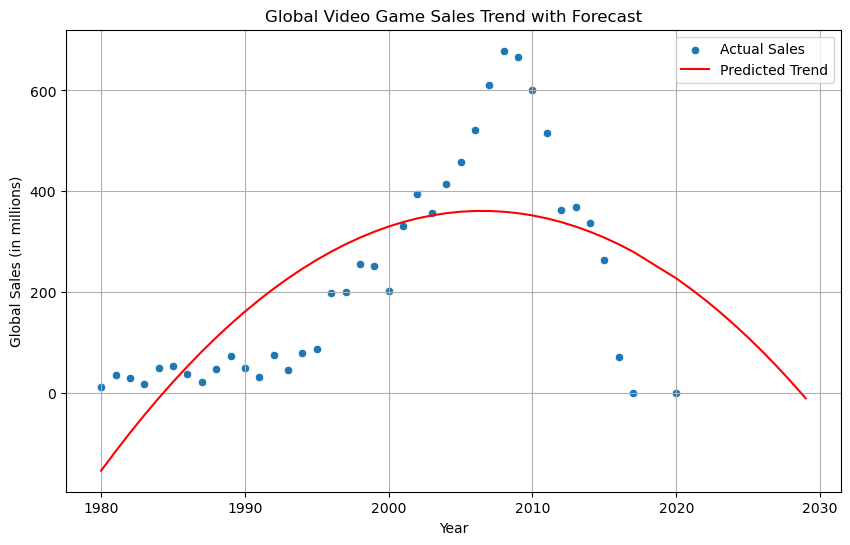

In [42]:
# Polynomial model degree 2

X = annual_sales[['Year']]
y = annual_sales['Global_Sales']

# Transform features to polynomial features

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model

model = LinearRegression()
model.fit(X_poly, y)
annual_sales['Predicted_Sales'] = model.predict(X_poly)

# Adding future years to the prediction

future_years = pd.DataFrame({'Year': range(int(annual_sales['Year'].max()) + 1, int(annual_sales['Year'].max()) + 10)})
future_X_poly = poly.transform(future_years[['Year']])
future_years['Predicted_Sales'] = model.predict(future_X_poly)

# Combining historical data with future forecasts

all_years = pd.concat([annual_sales[['Year', 'Global_Sales', 'Predicted_Sales']], future_years], ignore_index=True)

# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=annual_sales, label='Actual Sales')
sns.lineplot(x='Year', y='Predicted_Sales', data=all_years, color='red', label='Predicted Trend')
plt.title('Global Video Game Sales Trend with Forecast')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

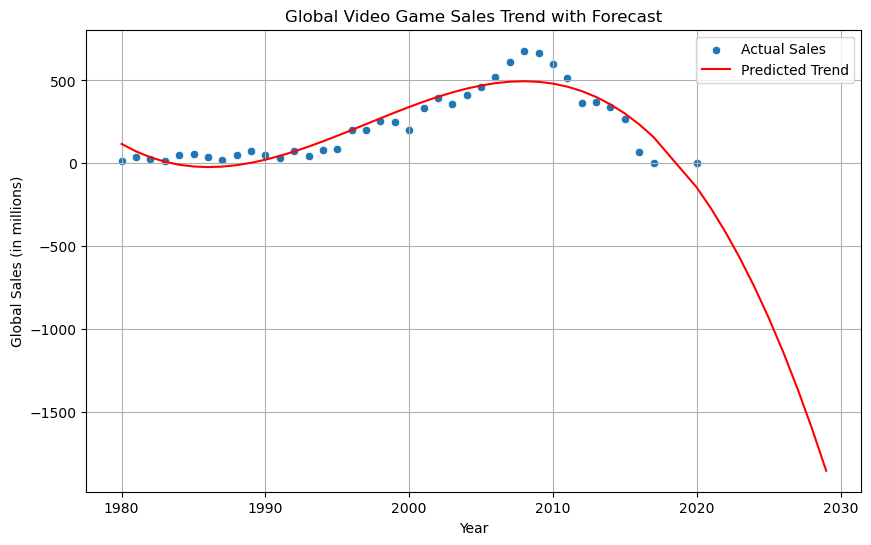

In [41]:
# Polynomial model degree 3

X = annual_sales[['Year']]
y = annual_sales['Global_Sales']

# Transform features to polynomial features (cubic)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the model

model = LinearRegression()
model.fit(X_poly, y)
annual_sales['Predicted_Sales'] = model.predict(X_poly)

# Adding future years to the prediction

future_years = pd.DataFrame({'Year': range(int(annual_sales['Year'].max()) + 1, int(annual_sales['Year'].max()) + 10)})
future_X_poly = poly.transform(future_years[['Year']])
future_years['Predicted_Sales'] = model.predict(future_X_poly)

# Combining historical data with future forecasts

all_years = pd.concat([annual_sales[['Year', 'Global_Sales', 'Predicted_Sales']], future_years], ignore_index=True)

# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=annual_sales, label='Actual Sales')
sns.lineplot(x='Year', y='Predicted_Sales', data=all_years, color='red', label='Predicted Trend')
plt.title('Global Video Game Sales Trend with Forecast')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

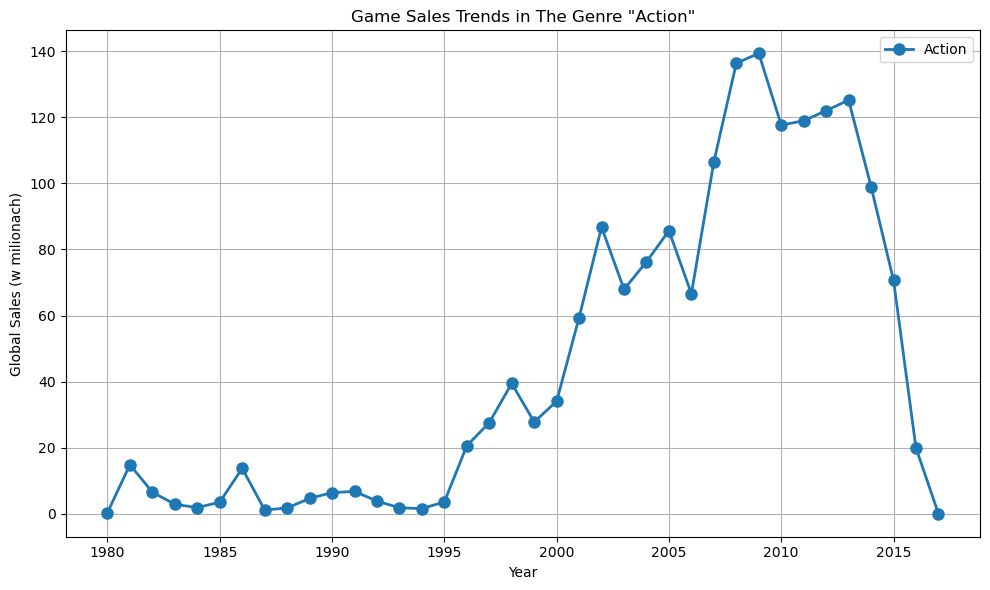

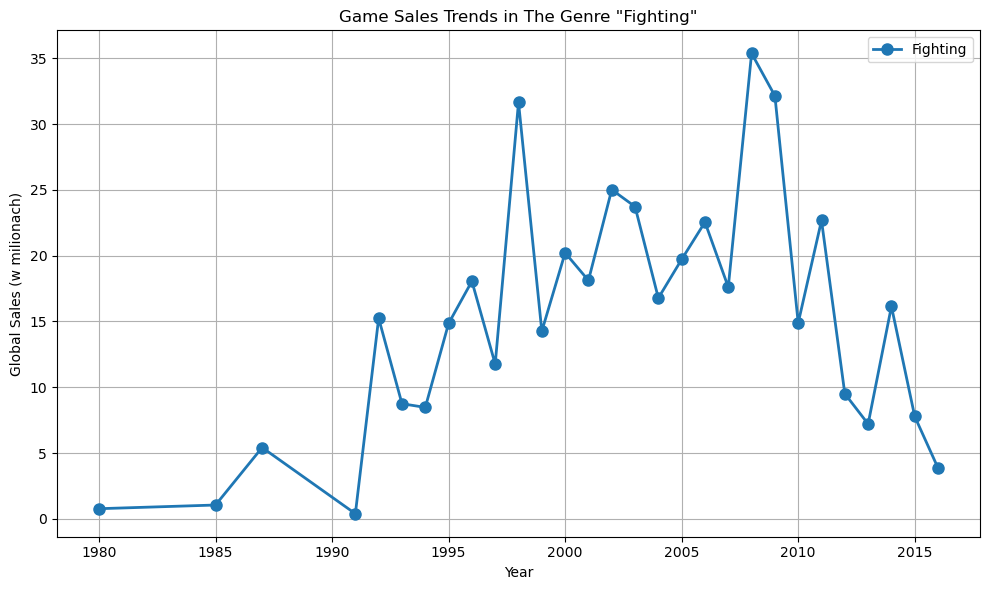

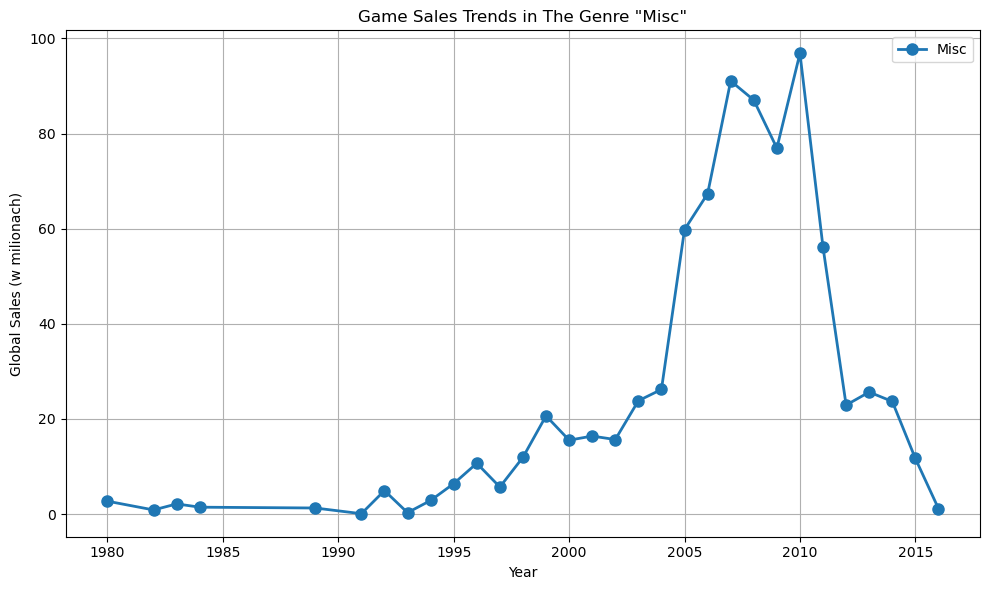

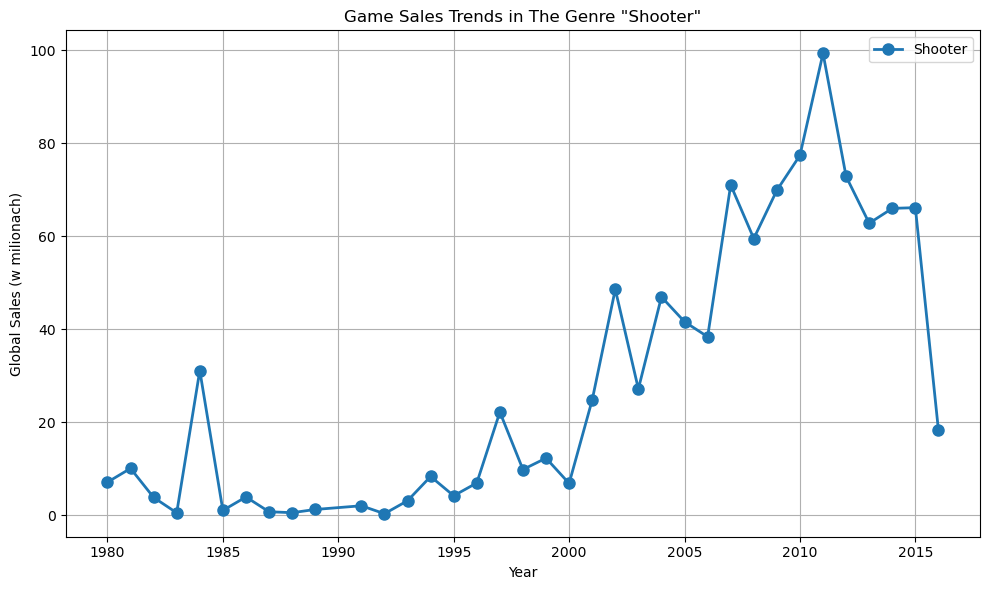

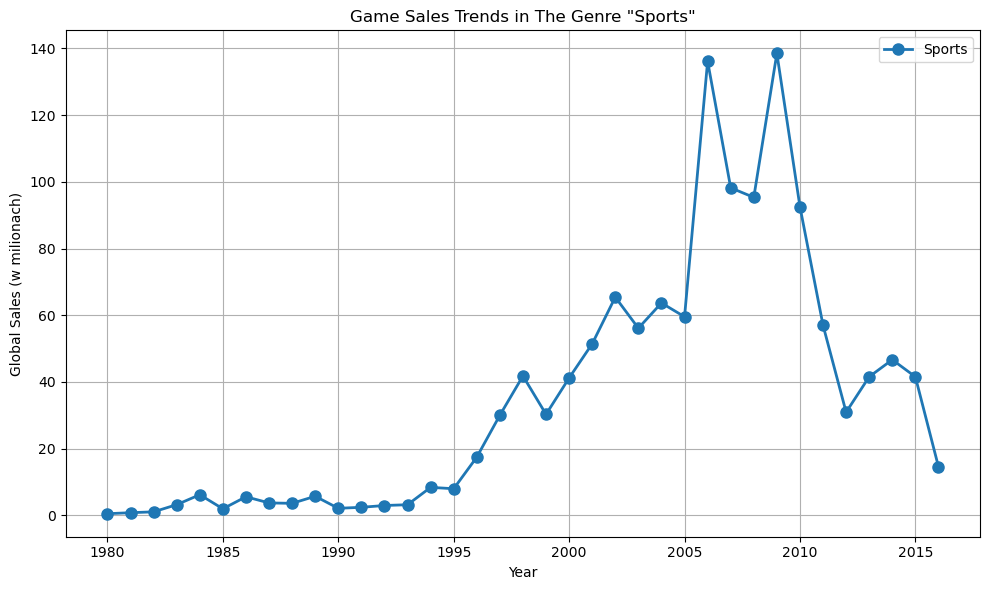

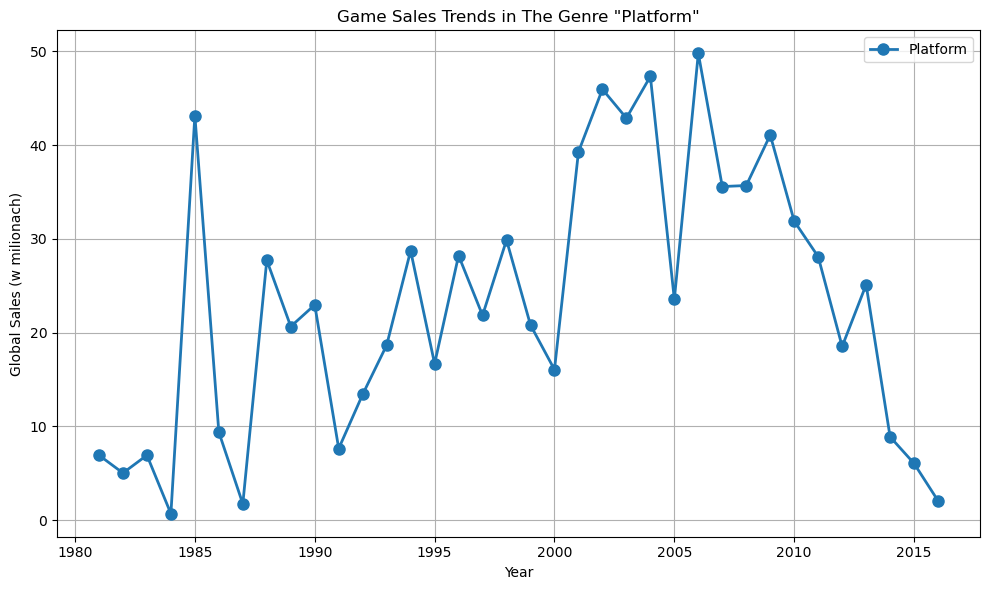

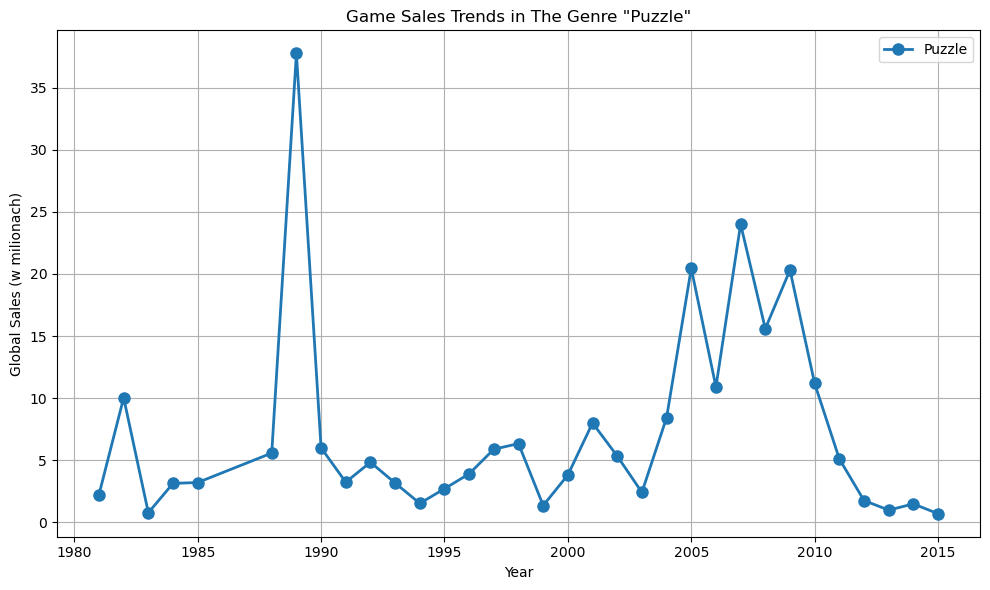

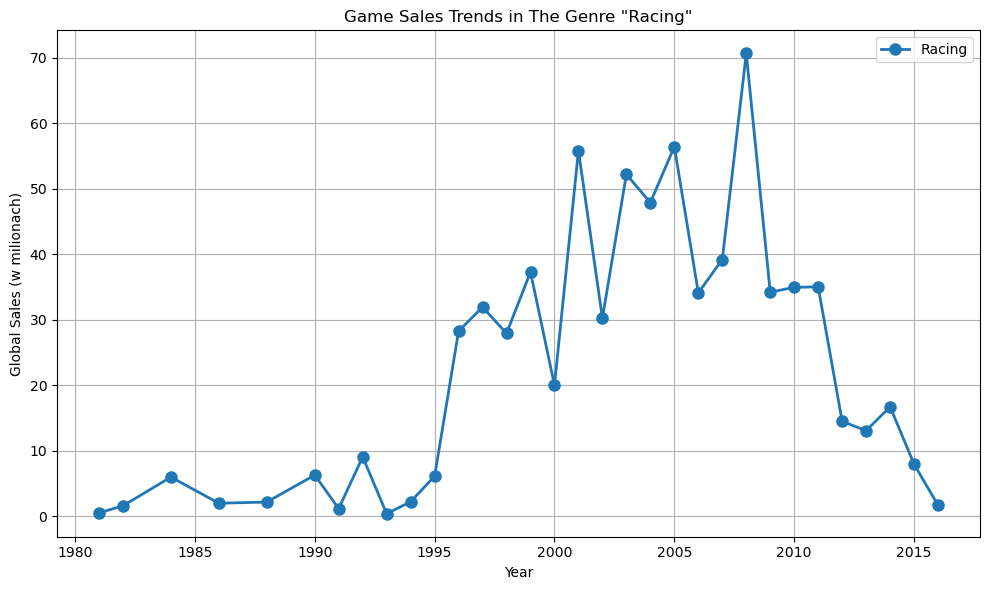

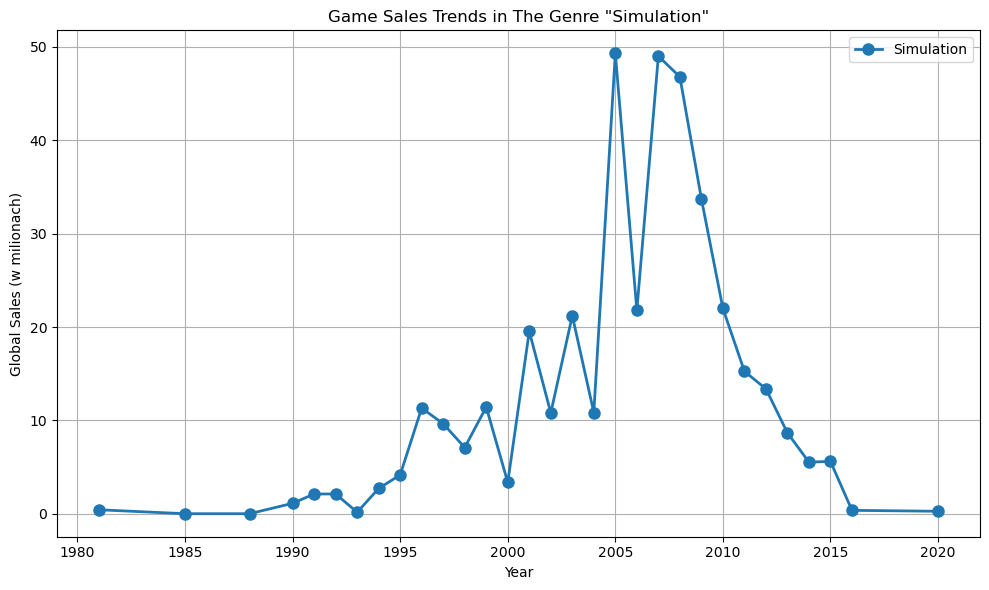

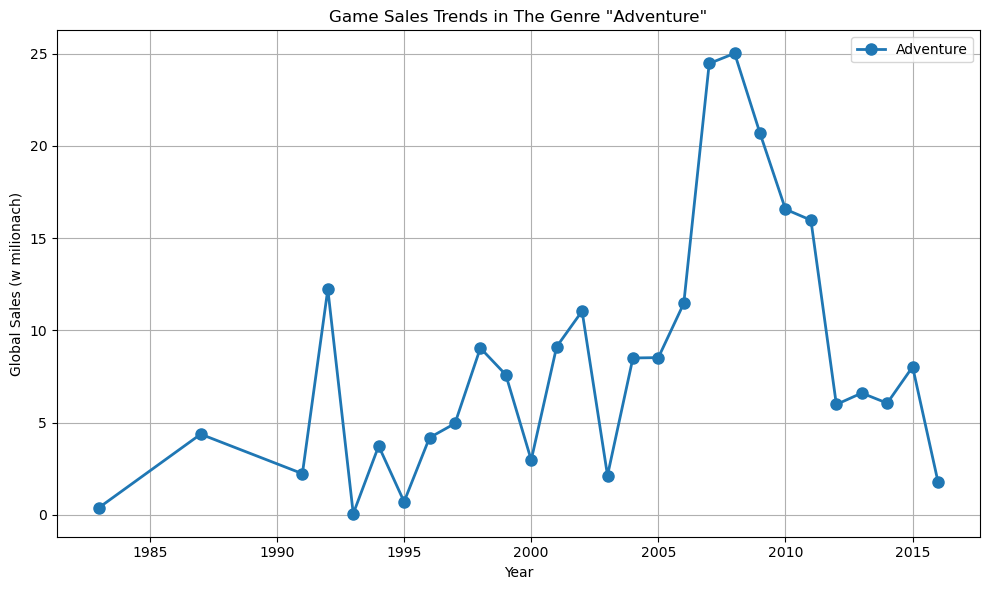

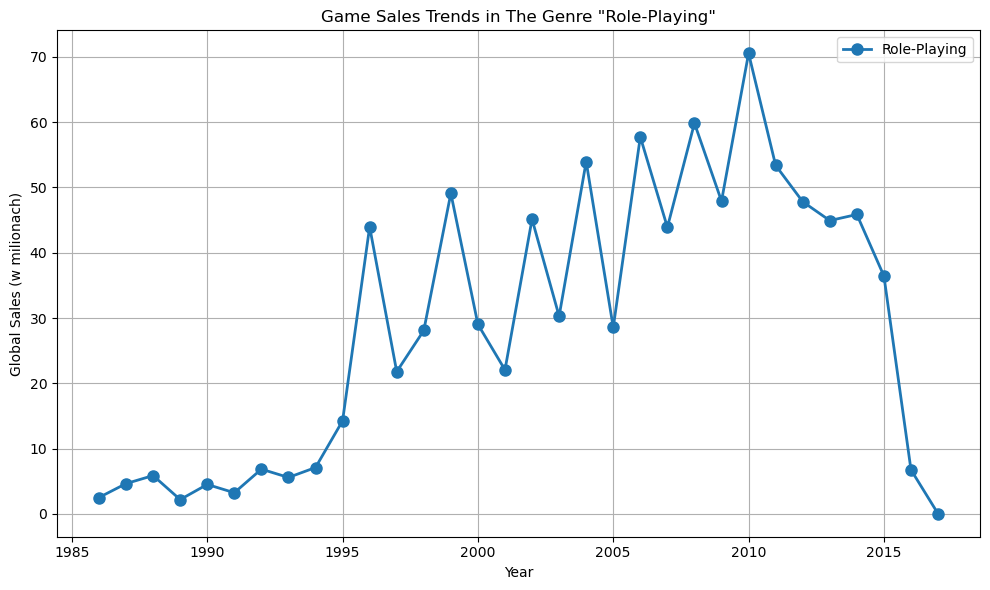

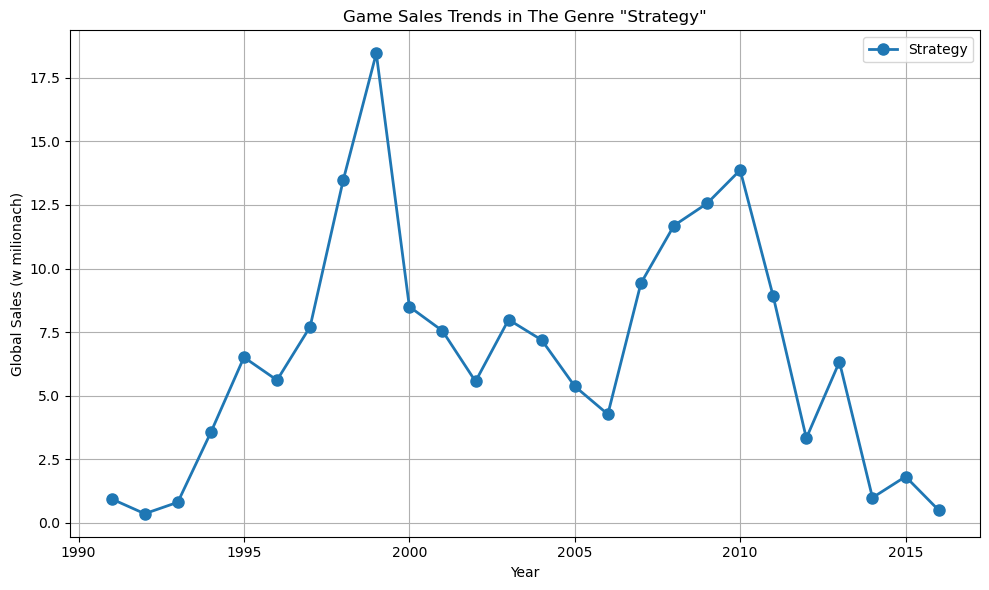

In [35]:
# Genre Trends

# Group data

genre_trends = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
genres = genre_trends['Genre'].unique()

# Generate plots

for genre in genres:
    plt.figure(figsize=(10, 6))
    genre_data = genre_trends[genre_trends['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Global_Sales'], marker='o', label=genre, linewidth=2, markersize=8)
    plt.title(f'Game Sales Trends in The Genre "{genre}"')
    plt.xlabel('Year')
    plt.ylabel('Global Sales (w milionach)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

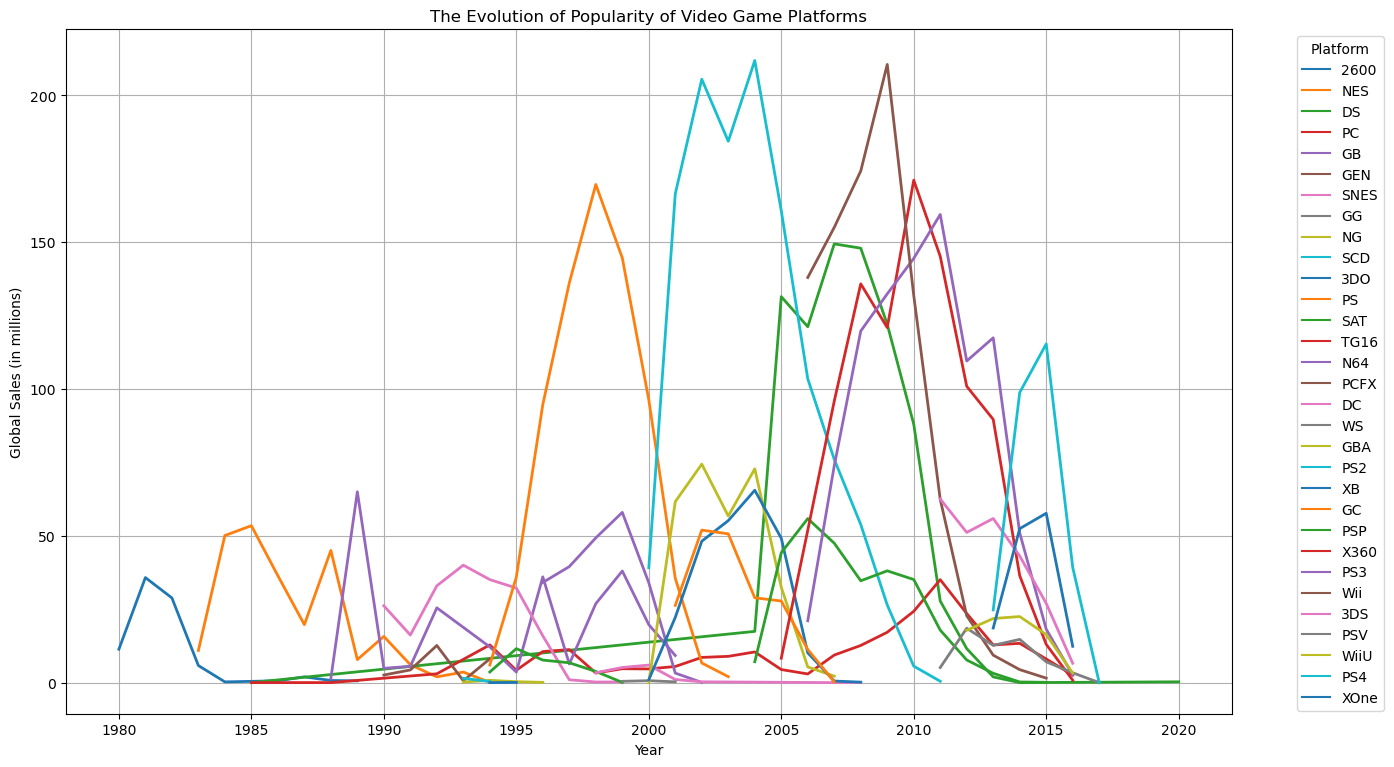

In [36]:
# Platform Evolution - analyzing how the popularity of different video game platforms has changed over time.

platform_trends = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Generate a plot

plt.figure(figsize=(14, 8))
sns.lineplot(data=platform_trends, x='Year', y='Global_Sales', hue='Platform', palette='tab10', linewidth=2)
plt.title('The Evolution of Popularity of Video Game Platforms')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

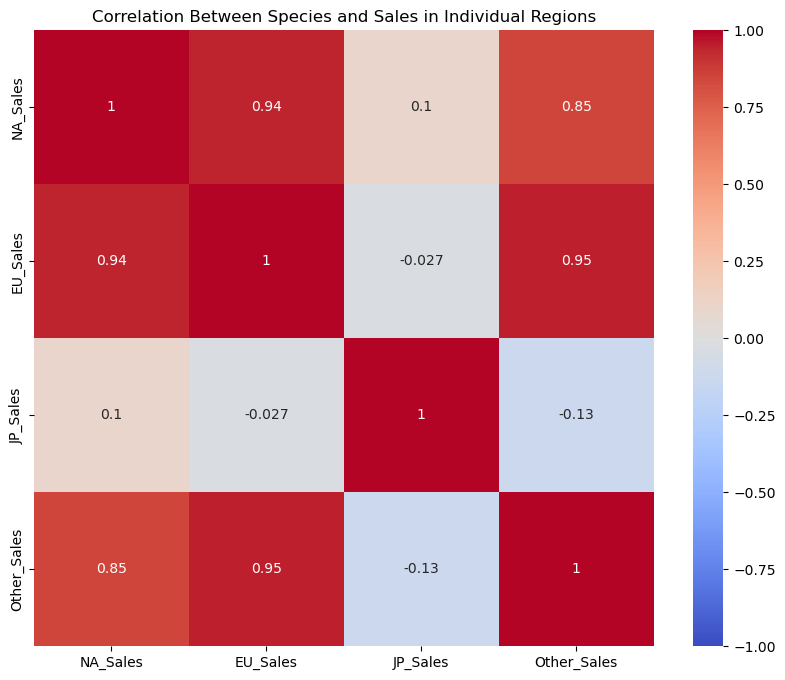

In [37]:
# Correlation Between Genres and Sales- analyzing whether certain game genres tend to sell higher in certain regions.

data_subset = data[['Genre'] + sales_columns]

# Grouping data by genre and calculating average sales in specific regions

genre_sales_mean = data_subset.groupby('Genre')[sales_columns].mean()

# Calculate the correlation between species and sales in specific regions

correlation_matrix = genre_sales_mean.corr()

# Generate a correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Between Species and Sales in Individual Regions')
plt.show()

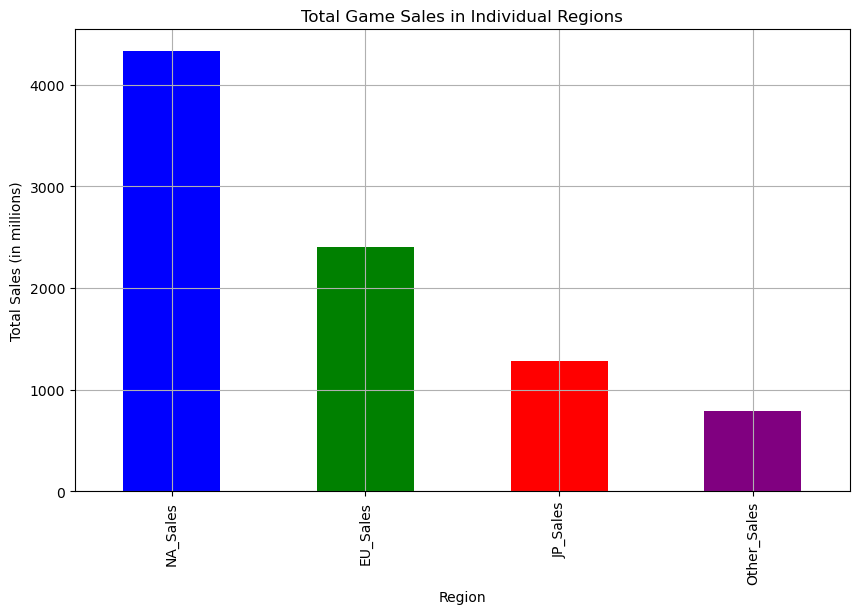

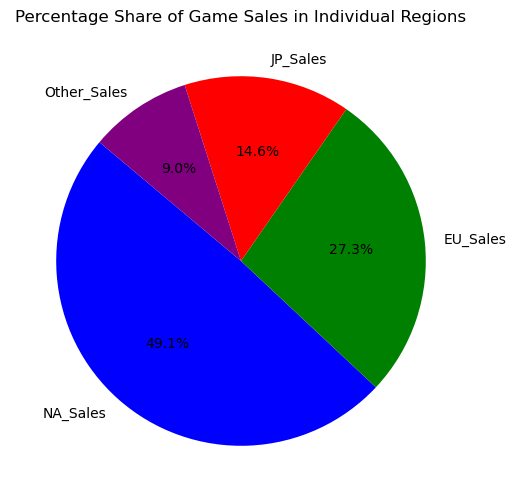

In [38]:
# Regional Analysis- comparing the impact of different regions on game sales

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Calculation of total sales for each region

region_sales_sum = data[sales_columns].sum()

# Calculation of each region's percentage of global sales

region_sales_percentage = (region_sales_sum / region_sales_sum['Global_Sales']) * 100

# Bar chart of total sales by region

plt.figure(figsize=(10, 6))
region_sales_sum.drop('Global_Sales').plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Total Game Sales in Individual Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

# Pie chart of sales percentage by region

plt.figure(figsize=(10, 6))
region_sales_percentage.drop('Global_Sales').plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'purple'])
plt.title('Percentage Share of Game Sales in Individual Regions')
plt.ylabel('')
plt.show()

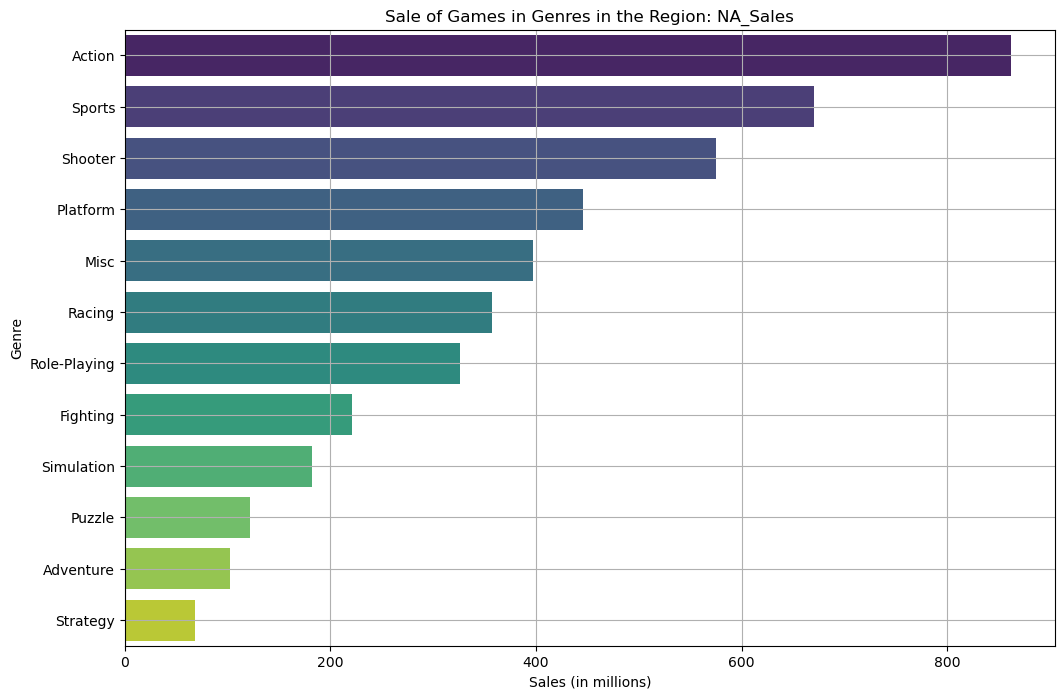

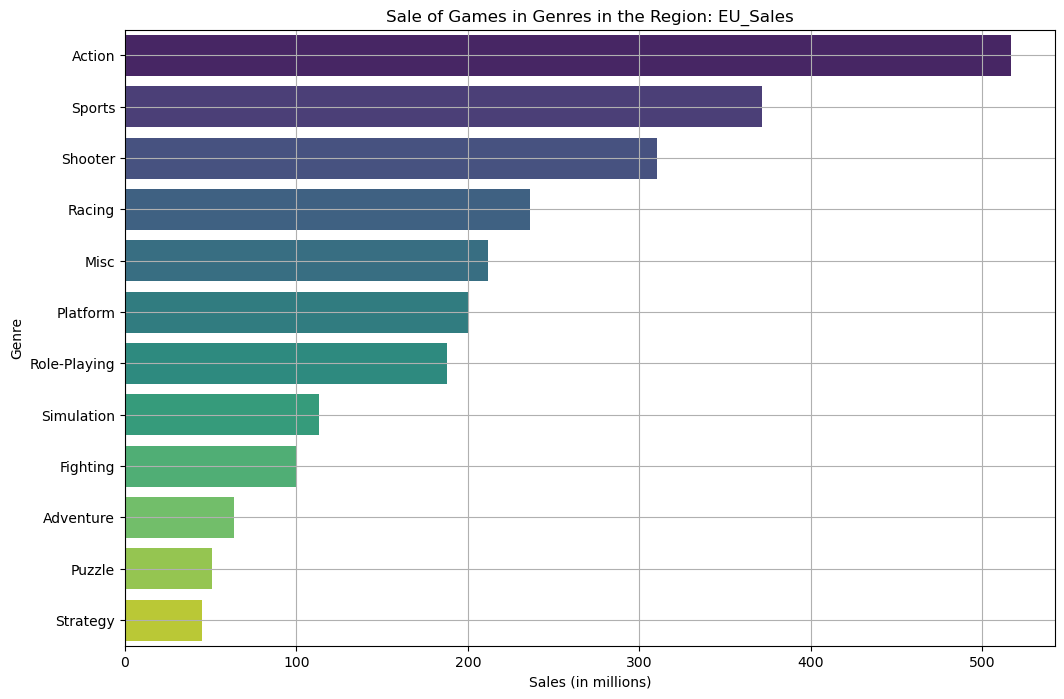

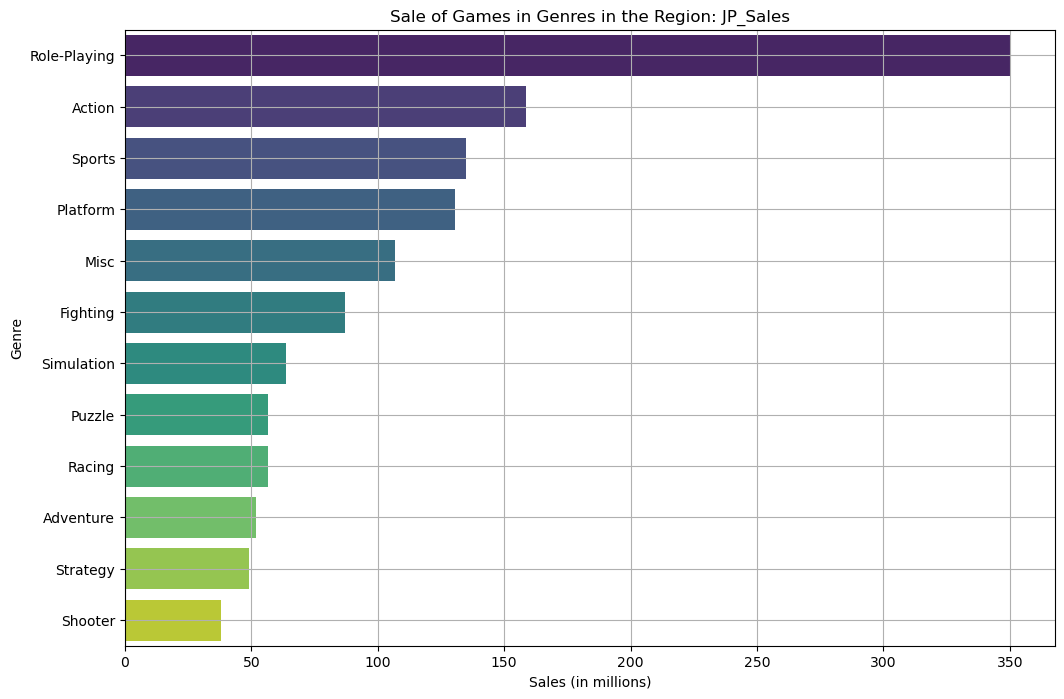

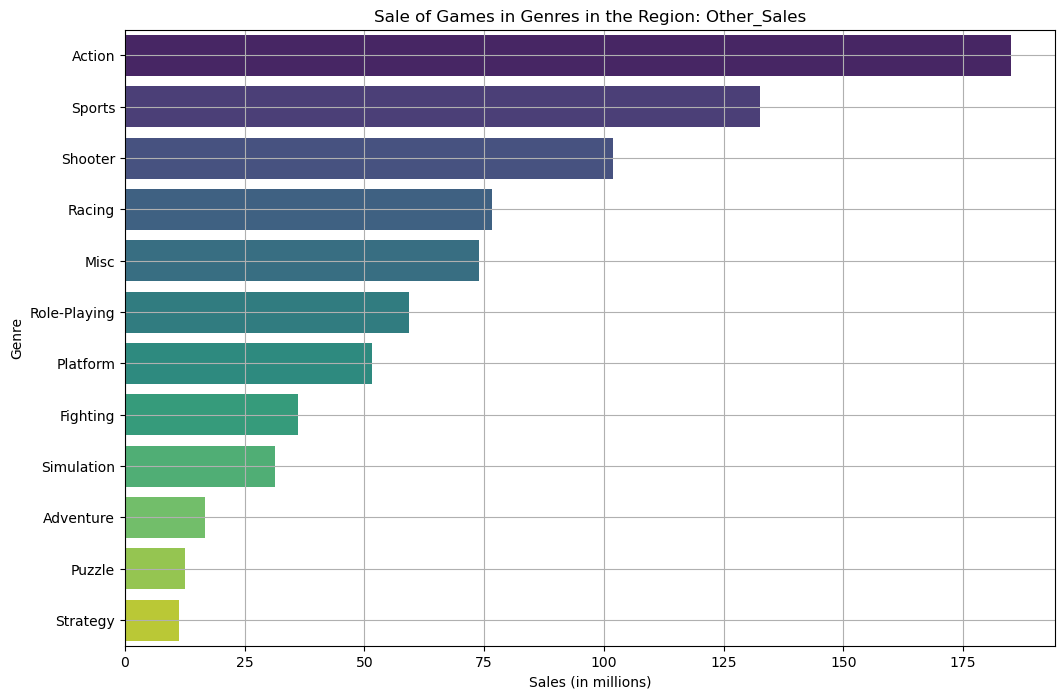

In [39]:
# Analysis of genre preferences in different regions

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for region in regions:
    genre_sales = data.groupby('Genre')[region].sum().reset_index().sort_values(by=region, ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=region, y='Genre', data=genre_sales, palette='viridis')
    plt.title(f'Sale of Games in Genres in the Region: {region}')
    plt.xlabel('Sales (in millions)')
    plt.ylabel('Genre')
    plt.grid(True)
    plt.show()



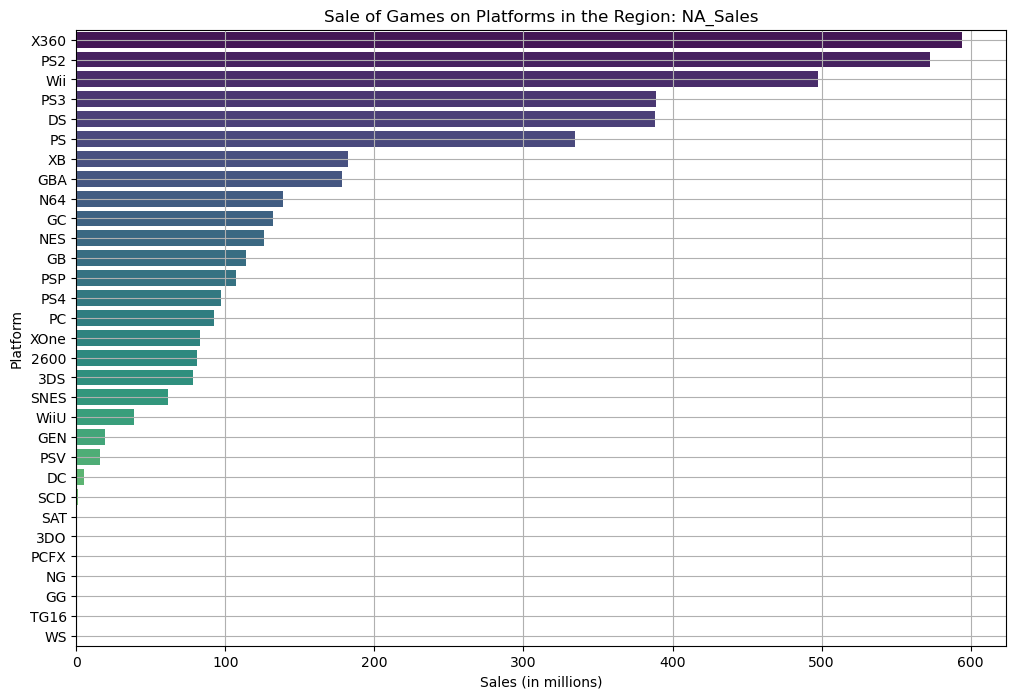

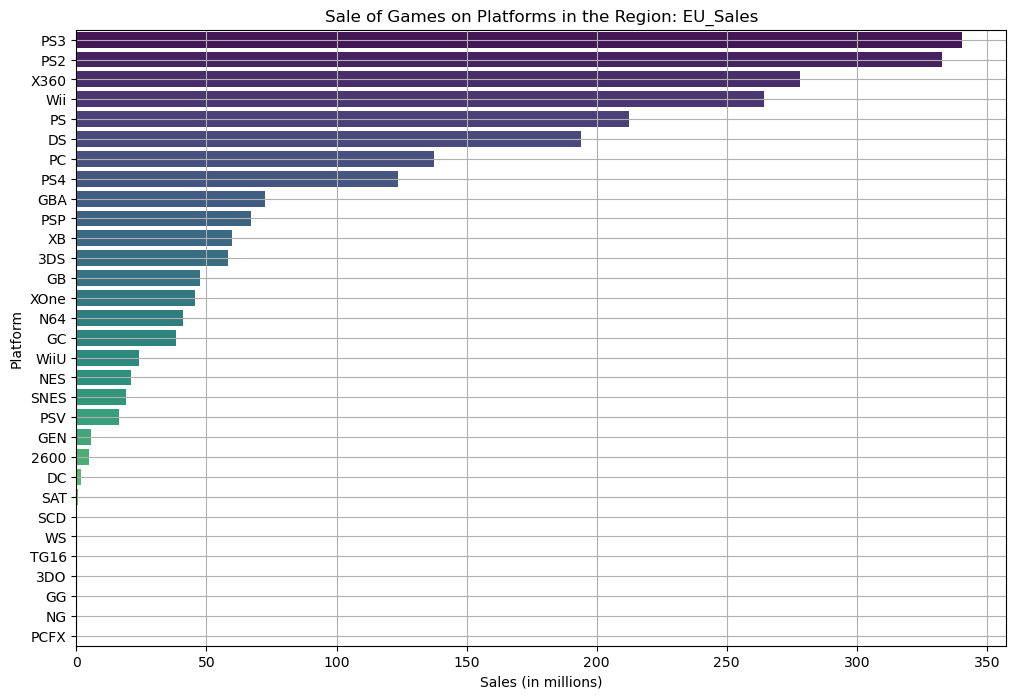

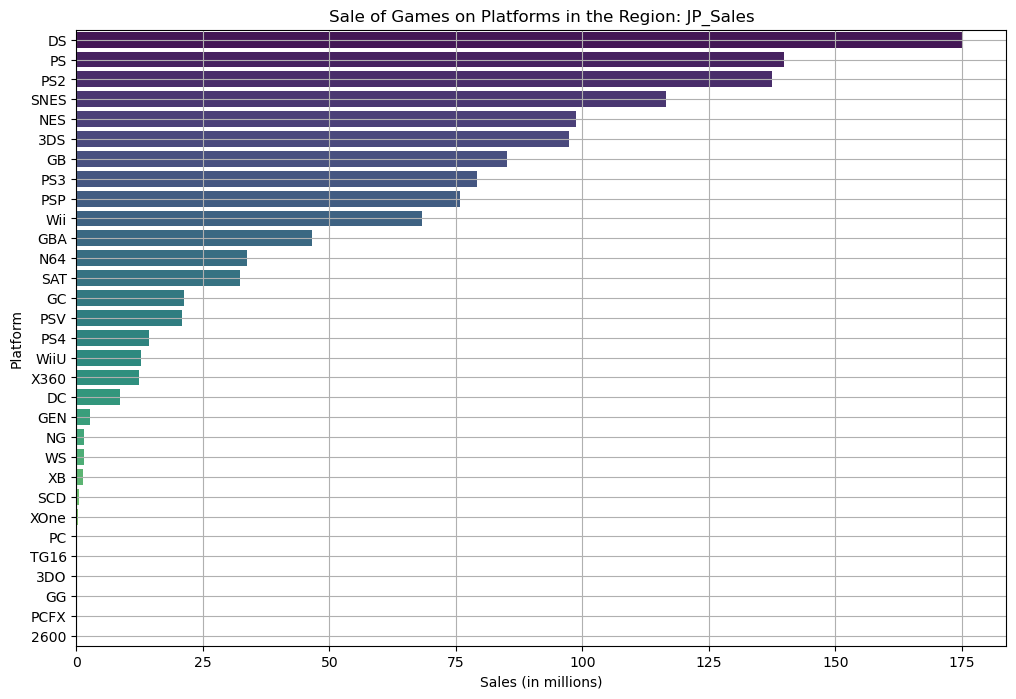

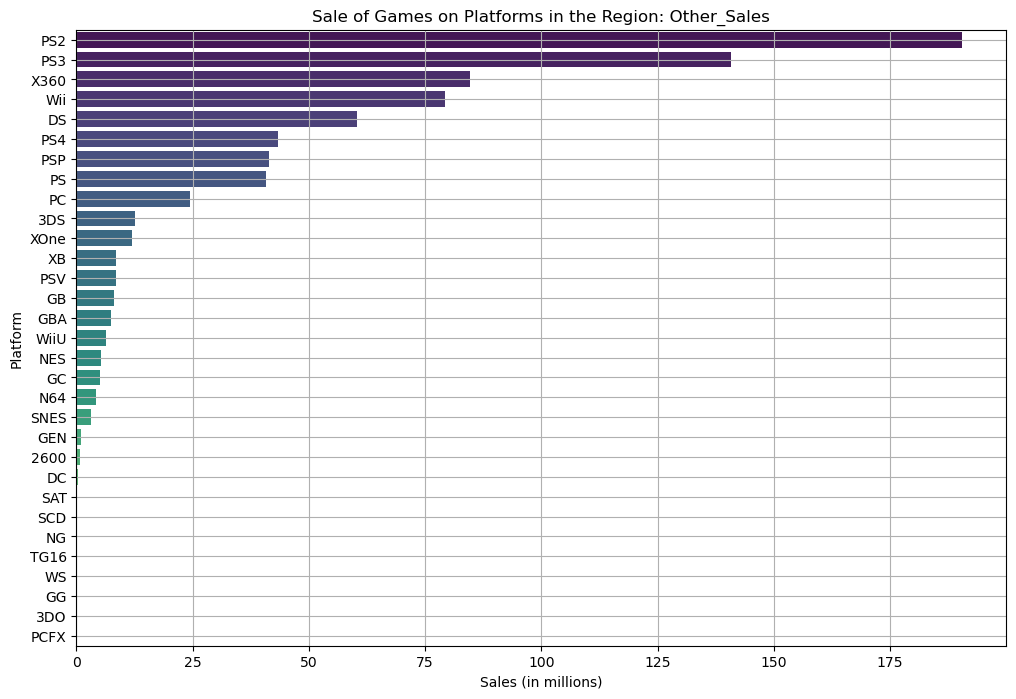

In [40]:
# Analysis of platform preferences in different regions

for region in regions:
    platform_sales = data.groupby('Platform')[region].sum().reset_index().sort_values(by=region, ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=region, y='Platform', data=platform_sales, palette='viridis')
    plt.title(f'Sale of Games on Platforms in the Region: {region}')
    plt.xlabel('Sales (in millions)')
    plt.ylabel('Platform')
    plt.grid(True)
    plt.show()